<a href="https://colab.research.google.com/github/faridkharis/skripsi/blob/main/2_Clustering_(K_Means).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
path = 'drive/MyDrive/Colab Notebooks/App Improvement Recommendation System/Data/'

In [4]:
df = pd.read_csv(path + 'data-ulasan-oy-preprocessed.csv')
df = df.drop(columns=['Unnamed: 0'])
df

,reviewId,content,score,at
0,38af8bc9-4d0c-4876-bffa-1594a0f9056e,"['tipu', 'pinjam', 'online', 'sja', 'di jalan'...",1,2023-02-23 14:14:12
1,ae34f40a-8184-4e04-8d9f-d66172cd4240,"['sampah', 'proses', 'refund', 'desember', 'fe...",1,2023-02-22 10:18:25
2,72afff6f-c64d-48c3-ba2f-7ed5801c96c0,"['maintenance', 'minggu', 'niat']",1,2023-02-15 14:09:18
3,3fef94d1-1a48-4673-b104-435c71e45a29,"['verifikasi', 'ktp', 'bilang', 'jam', 'si', '...",1,2023-02-15 05:37:33
4,ebc3ddaa-e20f-4a0b-ad97-3d742a109b98,"['bayar', 'via', 'bank', 'bank']",5,2023-02-10 01:02:20
...,...,...,...,...
12176,1d26639e-3db6-4141-b976-44cc0def63da,['so'],5,2017-09-29 09:22:47
12177,a44fb20b-3bf4-4a60-92af-ee38f68e8556,"['kembang', 'tunggu', 'update', 'fitur', 'muas...",5,2017-09-29 06:00:03
12178,a3337d05-f5db-42d2-9690-d36d4274df5b,['perfect'],5,2017-09-29 05:51:53
12179,a8d2ed88-f990-40df-811f-93c5bb001a02,['lgsung'],5,2017-09-28 02:25:33


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
vectorizer = TfidfVectorizer()
tfidf_transformer = TfidfTransformer()

vector_data = vectorizer.fit_transform(df['content'])

vector_data.shape

(12181, 9805)

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Loop over different values of k
for k in range(4, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(vector_data)
    
    # Calculate silhouette score
    score = silhouette_score(vector_data, labels)
    print("For k = {}, silhouette score is {}".format(k, score))

For k = 4, silhouette score is 0.018737059599227654
For k = 5, silhouette score is 0.022535693250017485
For k = 6, silhouette score is 0.025953469548794444
For k = 7, silhouette score is 0.02644955910333082
For k = 8, silhouette score is 0.022812452453944143
For k = 9, silhouette score is 0.02509309396066385


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn

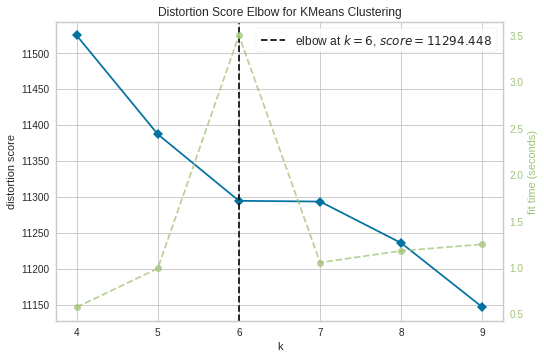

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,10))

visualizer.fit(vector_data)    # Fit the data to the visualizer
visualizer.show()    # Draw/show/show the data

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=0).fit(vector_data)
result = kmeans.labels_

<AxesSubplot:>

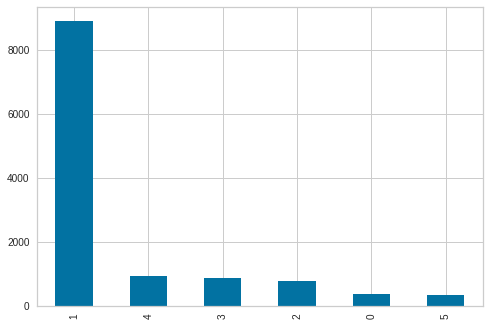

In [9]:
hist = pd.value_counts(result)
hist.plot(kind='bar')

In [11]:
print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(6):
  print("Cluster %d:" % i, end='\n')
  for ind in order_centroids[i, :2]:
    print(' %s' % terms[ind], end='')
    print()

Top terms per cluster:
Cluster 0:
 top
 up
Cluster 1:
 verifikasi
 transaksi
Cluster 2:
 poin
 tukar
Cluster 3:
 pulsa
 tukar
Cluster 4:
 transfer
 bank
Cluster 5:
 transaksi
 biaya
